1️⃣ Analysis of Defensive Actions Across All Matches
This heatmap visualizes the defensive actions (interceptions and tackles) of the OHL team across all matches.



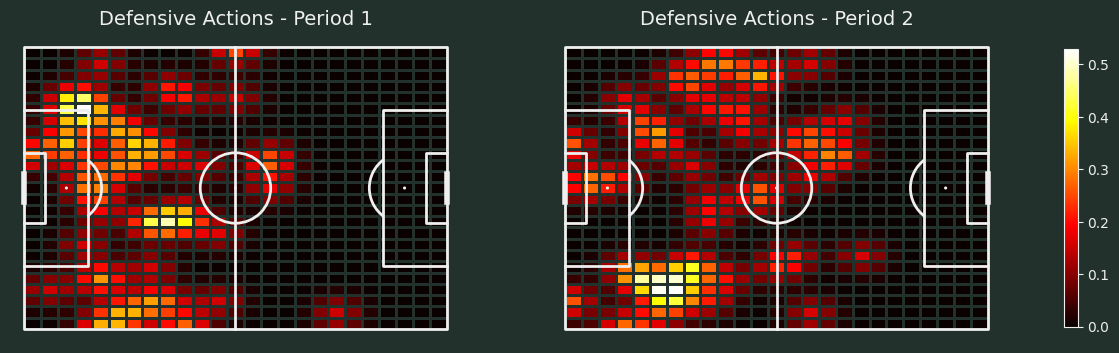

In [2]:
import pandas as pd
import psycopg2
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from scipy.ndimage import gaussian_filter

# Chargement des variables d'environnement depuis le fichier .env
load_dotenv()

# Paramètres de connexion à la base de données PostgreSQL
PG_PASSWORD = os.getenv("PG_PASSWORD", "gQVB?dFiN`9QTa;?")
PG_USER = os.getenv("PG_USER", "busit_129")
PG_HOST = os.getenv("PG_HOST", "fuji.ucll.be")
PG_PORT = os.getenv("PG_PORT", "52425")
PG_DATABASE = os.getenv("PG_DATABASE", "international_week")

# Fonction de connexion à la base de données PostgreSQL
def get_pg_connection():
    """
    Connexion à la base de données PostgreSQL.
    """
    conn = psycopg2.connect(
        dbname=PG_DATABASE,
        user=PG_USER,
        password=PG_PASSWORD,
        host=PG_HOST,
        port=PG_PORT
    )
    return conn

def plot_defensive_actions(con, team_id):
    """
    Compare les actions défensives (INTERCEPTION, TACKLE) entre la première et la deuxième mi-temps.
    """
    periods = [1, 2]
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.set_facecolor('#22312b')
    
    for i, period_id in enumerate(periods):
        query = f"""
        SELECT mt.x, mt.y
        FROM matchevents AS mt
        JOIN eventtypes AS et ON mt.eventtype_id = et.eventtype_id
        JOIN teams AS t ON t.team_id = mt.team_id
        WHERE t.team_id = '{team_id}'
        AND et.name IN ('INTERCEPTION', 'TACKLE')
        AND mt.success = true
        AND mt.period_id = {period_id}
        """
        
        df = pd.read_sql_query(query, con=con)

        # Création du terrain
        pitch = Pitch(pitch_type='statsbomb', line_zorder=2,
                      pitch_color='#22312b', line_color='#efefef')
        ax = axes[i]
        pitch.draw(ax=ax)
        
        # Statistiques de densité
        bin_statistic = pitch.bin_statistic(df['x'], df['y'], statistic='count', bins=(25, 25))
        bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], sigma=1)

        # Création de la heatmap
        pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
        ax.set_title(f"Defensive Actions - Period {period_id}", color='#efefef', fontsize=14)

    # Barre de couleur
    cbar = fig.colorbar(pcm, ax=axes, shrink=0.6, orientation='vertical')
    cbar.outline.set_edgecolor('#efefef')
    cbar.ax.yaxis.set_tick_params(color='#efefef')
    plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')
    
    plt.show()

# Connexion à la base de données
conn = get_pg_connection()
team_id = 'bw9wm8pqfzcchumhiwdt2w15c'
plot_defensive_actions(conn, team_id)

# Fermeture de la connexion
conn.close()

The distribution of defensive actions is well-balanced across the entire pitch. There is a notable concentration in the middle of the field, highlighting the team's strong pressing game and their ability to recover the ball early in the opposition's half.

Additionally, activity is evident on the flanks and near the penalty area, indicating that the defense is active in multiple zones of the pitch. This suggests a dynamic and proactive defense that is capable of defending both centrally and on the sides, thus preventing the opponent from progressing easily into dangerous areas.

In summary, the team's defensive setup in all matches shows good coverage across the pitch, with a focus on high pressing and proactive defending in various zones.

**Analysis of defensive actions in lost matches** 

This heatmap focuses on the defensive actions of the OHL team (tackles, interceptions, recoveries) in matches lost by OHL. 




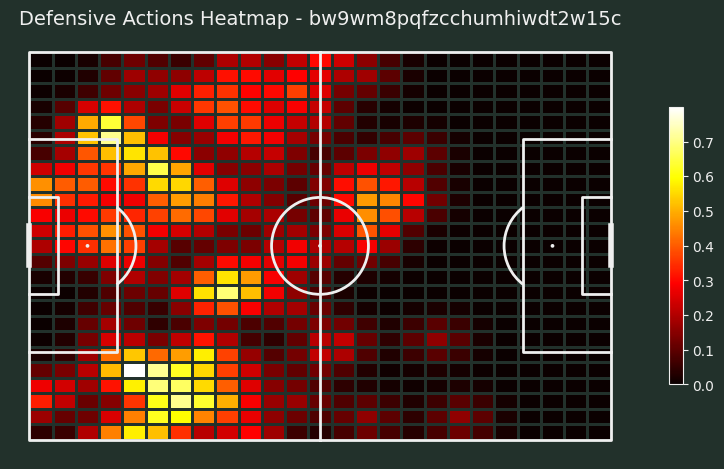

In [1]:
import pandas as pd
import psycopg2
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt
from mplsoccer import Pitch
from scipy.ndimage import gaussian_filter

# Chargement des variables d'environnement
load_dotenv()

# Paramètres de connexion
PG_PASSWORD = os.getenv("PG_PASSWORD", "gQVB?dFiN`9QTa;?")
PG_USER = os.getenv("PG_USER", "busit_129")
PG_HOST = os.getenv("PG_HOST", "fuji.ucll.be")
PG_PORT = os.getenv("PG_PORT", "52425")
PG_DATABASE = os.getenv("PG_DATABASE", "international_week")

# Connexion à la base de données
def get_pg_connection():
    return psycopg2.connect(
        dbname=PG_DATABASE,
        user=PG_USER,
        password=PG_PASSWORD,
        host=PG_HOST,
        port=PG_PORT
    )

def plot_defensive_actions_all_matches(con, team_id):
    """
    Affiche une heatmap des actions défensives (INTERCEPTION, TACKLE) pour tous les matchs.
    """
    query = f"""
    SELECT mt.x, mt.y
    FROM matchevents AS mt
    JOIN eventtypes AS et ON mt.eventtype_id = et.eventtype_id
    JOIN teams AS t ON t.team_id = mt.team_id
    WHERE t.team_id = '{team_id}'
    AND et.name IN ('INTERCEPTION', 'TACKLE')
    AND mt.success = true
    """

    df = pd.read_sql_query(query, con=con)

    # Création du terrain
    fig, ax = plt.subplots(figsize=(10, 6))
    fig.set_facecolor('#22312b')

    pitch = Pitch(pitch_type='statsbomb', line_zorder=2,
                  pitch_color='#22312b', line_color='#efefef')
    pitch.draw(ax=ax)

    # Création de la heatmap
    bin_statistic = pitch.bin_statistic(df['x'], df['y'], statistic='count', bins=(25, 25))
    bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], sigma=1)

    pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')

    # Barre de couleur
    cbar = fig.colorbar(pcm, ax=ax, shrink=0.6, orientation='vertical')
    cbar.outline.set_edgecolor('#efefef')
    cbar.ax.yaxis.set_tick_params(color='#efefef')
    plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

    ax.set_title(f"Defensive Actions Heatmap - {team_id}", color='#efefef', fontsize=14)
    
    plt.show()

# Connexion à la base de données
conn = get_pg_connection()
team_id = 'bw9wm8pqfzcchumhiwdt2w15c'
plot_defensive_actions_all_matches(conn, team_id)

# Fermeture de la connexion
conn.close()


The colors tell us the intensity of the defensive actions: 
the darker it is (red/black), 
the fewer defensive interventions; The lighter it is (yellow/white), the more actions there were. 

The visualization shows a significant concentration of defensive actions near the penalty area and on the flanks. This suggests that the team often found themselves defending deeper in their own half under pressure. There is also a decrease in defensive actions in the middle of the field, which could indicate a lack of high pressing and a tendency to retreat to absorb the opponent's attacks. This could mean that the team struggled to recover the ball quickly and were forced to defend in their last third of the land. In conclusion, the defensive configuration in lost games reflects a more responsive style of play, where the team defended deeper, especially on the wings and near its penalty area, probably due to insufficient pressing and a lack of control in the central areas of the field. 

